In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# save filepath to variable for easier access
lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
# read the data and store data in DataFrame titled lowa_data
home_data = pd.read_csv(lowa_file_path) 

In [3]:
# print a summary of the data in Lowa data
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
home_statistics = home_data.describe()

# What is the average lot size (rounded to nearest integer)?
avg_lot_size = int(home_statistics['LotArea'][1]) + 1
print("Avg lot size = ", avg_lot_size)

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 2018 - home_statistics['YearBuilt'][7]
print("Newest_home_age = ", newest_home_age)

Avg lot size =  10517
Newest_home_age =  8.0


In [5]:
## ================= Think About Your Data =========================

# The newest house in your data isn't that new.  A few potential explanations for this:
# 1. They haven't built new houses where this data was collected.
# 1. The data was collected a long time ago. Houses built after the data publication wouldn't show up.

# If the reason is explanation #1 above, does that affect your trust in the model you build with this data? What about
# if it is reason #2?

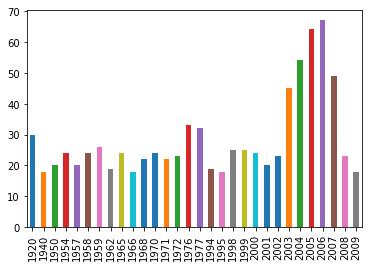

In [6]:
home_data['YearBuilt'].value_counts().head(30).sort_index().plot.bar()

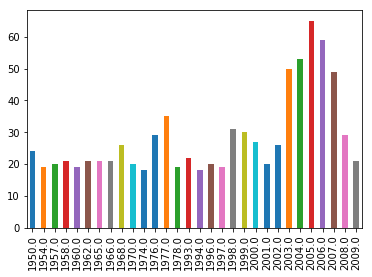

In [7]:
home_data['GarageYrBlt'].value_counts().head(30).sort_index().plot.bar()

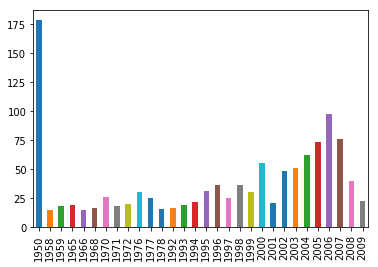

In [8]:
home_data['YearRemodAdd'].value_counts().head(30).sort_index().plot.bar()

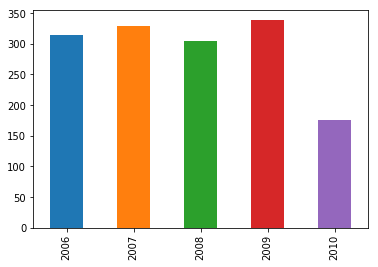

In [9]:
home_data['YrSold'].value_counts().head(30).sort_index().plot.bar()

In [10]:
# =============== Explanation of Reasons Using Bar Graphs ======================

# One way to see this is to look at histograms of the data with year values (YearBuilt, YearRemodAdd, GarageYrBlt, YrSold). 
# If the histograms are right skewed (with a right tail), then it could be possible where newer houses were being 
# built/sold/remodeled less frequently in the area. If the histograms are not right skewed (more uniform/flat or left skewed), 
# then #2 becomes more likely where the data was collected sometime near 2010 with no data on houses after that.

# Looking at the histograms/distribution of the data, it looks like the year data is either close to uniform (YrSold), 
# or is mostly left skewed (YearBuilt, GarageYrBlt, YearRemodAdd). This points to the data being collected a while ago 
# since there is an 'abrupt' stoppage of data at the more recent years.

In [11]:
# ======================  Selecting Data for Modeling  ========================

# To choose variables/columns, we'll need to see a list of all columns in the dataset
print(home_data.columns)

# select the column we want to predict, which is called the prediction target. 
# By convention, the prediction target is called y
y = home_data.SalePrice

# choose features
# Create the list of features below
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# select data corresponding to features in feature_names
X = home_data[feature_names]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
# =======================  Review Data  =========================

# print description or statistics from X
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [13]:
# print the top few lines
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [14]:
# =====================  Building Your Model  ========================

# 1 - Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters 
#     of the model type are specified too.
# 2 - Fit: Capture patterns from provided data. This is the heart of modeling.
# 3 - Predict: Just what it sounds like
# 4 - Evaluate: Determine how accurate the model's predictions are.


from sklearn.tree import DecisionTreeRegressor
# specify the model. 
# For model reproducibility, set a numeric value for random_state when specifying the model
lowa_model = DecisionTreeRegressor(random_state = 1)

# Fit the model
lowa_model.fit(X, y)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [15]:
predictions = lowa_model.predict(X)
print("Predictions on Training Set : ", predictions)
print("\nAcutal Output (y) : ", y.values)

Predictions on Training Set :  [208500. 181500. 223500. ... 266500. 142125. 147500.]

Acutal Output (y) :  [208500 181500 223500 ... 266500 142125 147500]


In [16]:
# ====================  Model Validation  ======================

# huge mistake when measuring predictive accuracy on train set
# Mean Absolute Error (also called MAE) is one of the metric for summarizing model quality
# error = actual − predicted
# With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. 
# We then take the average of those absolute errors.

# measure performance on data that wasn't used to build the model. The most straightforward way 
# to do this is to exclude some data from the model-building process, and then use those to test 
# the model's accuracy on data it hasn't seen before. This data is called validation data.

In [17]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [18]:
# Specify the model
lowa_model = DecisionTreeRegressor(random_state = 1)

# Fit iowa_model with the training data.
lowa_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [19]:
# Predict with all validation observations
val_predictions = lowa_model.predict(val_X)

In [20]:
# print the top few validation predictions
print(val_predictions[0:5])
# print the top few actual prices from validation data
print(val_y.head().values)

[186500. 184000. 130000.  92000. 164500.]
[231500 179500 122000  84500 142000]


In [21]:
# ====================  Calculate the Mean Absolute Error in Validation Data  ==================

from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

print("MAE without any optimization: ", val_mae)

MAE without any optimization:  29652.931506849316


In [22]:
# ===================  Overfitting and Underfitting  ======================

# The phenomenon is called overfitting, where a model matches the training data almost perfectly, 
# but does poorly in validation and other new data.

# When a model fails to capture important distinctions and patterns in the data, so it performs 
# poorly even in training data, that is called underfitting.

In [23]:
# max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. 
# The more leaves we allow the model to make, the more we move from the underfitting area to the overfitting area.

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [24]:
# ==================  Compare Different Tree Sizes  ======================

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
print("No. of leaves with MAE: \n", scores)

best_tree_size = min(scores, key = scores.get)
print("\nOptimal leaf size: %d with MAE: %d" %(best_tree_size, scores[best_tree_size]))

No. of leaves with MAE: 
 {5: 35044.51299744237, 25: 29016.41319191076, 50: 27405.930473214907, 100: 27282.50803885739, 250: 27893.822225701646, 500: 29454.18598068598}

Optimal leaf size: 100 with MAE: 27282


In [25]:
# ==================  Fit Model Using All Data  ==================

# You know the best tree size. If you were going to deploy this model in practice, you would make 
# it even more accurate by using all of the data and keeping that tree size.  That is, you don't need 
# to hold out the validation data now that you've made all your modeling decisions.

final_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size , random_state=0)

# fit the final model
final_model = final_model.fit(X, y)

In [26]:
# run all the cells above to run this cell

print("Validation MAE when not specifying max_leaf_nodes: ", val_mae)
print("Validation MAE for best value of max_leaf_nodes: ", scores[best_tree_size])

Validation MAE when not specifying max_leaf_nodes:  29652.931506849316
Validation MAE for best value of max_leaf_nodes:  27282.50803885739


In [27]:
# ======================  Random Forest ========================

from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state = 1)

# fit your model
rf_model.fit(train_X, train_y)

# predict on validation set
val_predictions = rf_model.predict(val_X)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, val_predictions)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 22762.42931506849


In [28]:
# run all the cells above to run this cell

print("Validation MAE for Decision Tree when not specifying max_leaf_nodes: ", val_mae)
print("Validation MAE for Decision Tree when best value of max_leaf_nodes: ", scores[best_tree_size])
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Decision Tree when not specifying max_leaf_nodes:  29652.931506849316
Validation MAE for Decision Tree when best value of max_leaf_nodes:  27282.50803885739
Validation MAE for Random Forest Model: 22762.42931506849


In [29]:
# =================  when and why to use Random Forest vs Decision Tree  =======================

# If the goal is better predictions, we should prefer RF, to reduce the variance.
# If the goal is exploratory analysis, we should prefer a single DT , as to understand the 
# data relationship in a tree hierarchy structure.

# Decision Tree is better when the dataset have a “Feature” that is really important to take a decision. 
# Random Forest, select some “Features” randomly to build the Trees, if a “Feature” is important, 
# sometimes Random Forest will build trees that will not have the significance that the“Feature” has 
# in the final decision. I think that Random Forest is good to avoid low quality of data, example: 
# Imagine a dataset that shows (all houses that doors are green have a high cost), in Decision Trees 
# this is a bias in the data that can be avoid in Random Forest

# If you don't specify the number of trees, the default is 10 trees. Adding more trees generally slightly 
# increases accuracy, while also increasing computational demands.
# In practice, I've commonly seen people specify much larger forests than the default (e.g. 100 trees). 
# But you hit a point of diminishing returns. You could run even much larger forests then that without
# running out of memory. But it is slower.

# Decision Tree is more easy than a Random Forest . But a Random Forest makes it easy to work with data 
# to make a good prediction with large number of columns.

In [30]:
# ============  Make Random Forest on train data and predict on test data ==================

# ========================  How to submit on Kaggle ==============================

rf_model_on_full_data = RandomForestRegressor()
rf_model_on_full_data.fit(X, y)

lowa_test_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/test.csv'
test_data = pd.read_csv(lowa_test_file_path)
test_X = test_data[feature_names]

test_preds = rf_model_on_full_data.predict(test_X)

# The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})

# output.to_csv('E:/Data Science/Machine Learning/Iowa Housing Prices/submission.csv', index=False)

In [31]:
# save filepath to variable for easier access
lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
# read the data and store data in DataFrame titled lowa_data
home_data = pd.read_csv(lowa_file_path) 

In [32]:
# print summary of data

home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
# =====================   Handling Missing Values  ==========================

# Python libraries represent missing numbers as nan which is short for "not a number". 
# You can detect which cells have missing values, and then count how many there are in each column with the command

array = home_data.values
print("Total Columns in dataset: ", array.shape[1])

missing_val_count_by_column = (home_data.isnull().sum())
print("Total Columns in dataset with missing values: ", len(missing_val_count_by_column[missing_val_count_by_column > 0]))

Total Columns in dataset:  81
Total Columns in dataset with missing values:  19


In [34]:
# =============== Method1: A Simple Option: Drop Columns with Missing Values  ================

# It can be useful when most values in a column are missing.
# Mostly, it is not useful to do this task.

data_without_missing_values = home_data.dropna(axis=1)
array_without_missing_values = data_without_missing_values.values
print("Total Columns in dataset after dropping of columns: ", array_without_missing_values.shape[1])

Total Columns in dataset after dropping of columns:  62


In [35]:
# =================  Method2: Imputation  =================

# Imputation fills in the missing value with some number. The imputed value won't be exactly 
# right in most cases, but it usually gives more accurate models than dropping the column entirely.

lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
home_data = pd.read_csv(lowa_file_path) 

missing_val_count_by_column = (home_data.isnull().sum())
print("Total Columns in dataset with missing values before imputation: ", len(missing_val_count_by_column[missing_val_count_by_column > 0]))

# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_with_imputed_values = my_imputer.fit_transform(home_data.select_dtypes(exclude=['object']).values)   # use only numeric values

data_with_imputed_values = pd.DataFrame(data_with_imputed_values)
missing_val_count_by_column = (data_with_imputed_values.isnull().sum())
print("Total Columns in dataset with missing values after imputation: ", len(missing_val_count_by_column[missing_val_count_by_column > 0]))

Total Columns in dataset with missing values before imputation:  19
Total Columns in dataset with missing values after imputation:  0


In [36]:
# =============== Method3: A Simple Option: Drop Rows with Missing Values  ================

# Use this method when we have a lot of data and only few rows dropped as a result
# In this case, this is not recommended because it reduces (No. of rows redcues to zero)

lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
home_data = pd.read_csv(lowa_file_path)

array_with_missing_values = home_data.values
print("Total Rows in dataset before dropping of rows: ", array_with_missing_values.shape[0])

data_without_missing_values = home_data.dropna(axis=0)
array_without_missing_values = data_without_missing_values.values
print("Total Rows in dataset after dropping of rows: ", array_without_missing_values.shape[0])

Total Rows in dataset before dropping of rows:  1460
Total Rows in dataset after dropping of rows:  0


In [37]:
# =========  One-Hot Encoding : The Standard Approach for Categorical Data  ============

# One hot encoding is the most widespread approach, and it works very well unless your categorical 
# variable takes on a large number of values (i.e. you generally won't it for variables taking more 
# than 15 different values. It'd be a poor choice in some cases with fewer values, though that varies.)

# =========== Categoricals with Many Values  =============
# USE -> Scikit-learn's FeatureHasher uses the hashing trick to store high-dimensional data.

# Two approaches can be used and measure the performance of model for benchmark:
# 1- One-hot encoded categoricals as well as numeric predictors
# 2- Numerical predictors, where we drop categoricals.

lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
train_home_data = pd.read_csv(lowa_file_path)
train_home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:

def checkLengthOfCategoricalFeaturesOfDataFrame(df, thresh_num):
    col_found = False
    # get list of dataframe columns to iterate
    df_cols = list(train_home_data.columns.values)
    for col in df_cols:
        # check different no. of values in only categorical features
        if(df[col].value_counts().size > thresh_num and df[col].dtype == "object"):
            col_found = True
            print(col)
    if(col_found == False):
        print("No Categorical feature found with more than " + thresh_num + " different values")

In [39]:
print("Categorical features with more than 15 different values are : \n")
checkLengthOfCategoricalFeaturesOfDataFrame(train_home_data, 15)

Categorical features with more than 15 different values are : 

Neighborhood
Exterior2nd


In [40]:
# Pandas offers a convenient function called get_dummies to get one-hot encodings

one_hot_encoded_train_home_data = pd.get_dummies(train_home_data)
one_hot_encoded_train_home_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [41]:
# ===========  Applying to Multiple Files  ===============

# Ensure the test data is encoded in the same manner as the training data with the align command
# The align command makes sure the columns show up in the same order in both datasets (it uses column names 
# to identify which columns line up in each dataset.) The argument join='left' specifies that we will do 
# the equivalent of SQL's left join. That means, if there are ever columns that show up in one dataset and 
# not the other, we will keep exactly the columns from our training data. The argument join='inner' would do 
# what SQL databases call an inner join, keeping only the columns showing up in both datasets. That's also a sensible choice.

train_lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
test_lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/test.csv'
train_home_data = pd.read_csv(train_lowa_file_path)
test_home_data = pd.read_csv(test_lowa_file_path)
one_hot_encoded_training_predictors = pd.get_dummies(train_home_data)
one_hot_encoded_test_predictors = pd.get_dummies(test_home_data)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)
print(final_train.shape)
print(final_test.shape)

(1460, 290)
(1459, 290)


In [42]:
# ===================  XGBoost ========================

# XGBoost is the leading model for working with standard tabular data (the type of data you store
# in Pandas DataFrames, as opposed to more exotic types of data like images and videos). XGBoost models 
# dominate many Kaggle competitions.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [43]:
lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
data = pd.read_csv(lowa_file_path)
# drop only rows where SalePrice is NaN
data.dropna(axis = 0, subset = ['SalePrice'], inplace = True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis = 1).select_dtypes(exclude = ['object'])
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state = 1)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [44]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(train_X, train_y, verbose = False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
# make predictions
predictions = my_model.predict(test_X)

In [46]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 15247.674678938356


In [47]:
#  ====================  XGBoost Model Tuning  ======================

# XGBoost is currently the dominant algorithm for building accurate models 
# on conventional data (also called tabular or strutured data).

# n_estimators specifies how many times to go through the modeling cycle described above.
# In the underfitting vs overfitting graph, n_estimators moves you further to the right. 
# Too low a value causes underfitting, which is inaccurate predictions on both training data and new data. 
# Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions 
# on new data (which is what we care about). You can experiment with your dataset to find the ideal. 
# Typical values range from 100-1000, though this depends a lot on the learning rate discussed below.

# The argument early_stopping_rounds offers a way to automatically find the ideal value. Early stopping causes the 
# model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. 
# It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.
# Since random chance sometimes causes a "single round" where validation scores don't improve, you need to specify 
# a number for how many rounds of straight deterioration to allow before stopping. early_stopping_rounds = 5 is a 
# reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
# learning_rate is an important hyperparameter for tuning
# It is very useful to avoid overfitting of model.
# With samll learning_rate, you can use a higher value of n_estimators without overfitting. 
# If you use early stopping, the appropriate number of trees will be set automatically.

# In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, 
# though it will also take the model longer to train since it does more iterations through the cycle.

# On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. 
# It's common to set the parameter "n_jobs" equal to the number of cores on your machine. On smaller datasets, this won't help.
# XGBoost has a multitude of other parameters, but these will go a very long way in helping you fine-tune your XGBoost 
# model for optimal performance.

my_model = XGBRegressor(n_estimators=1070, learning_rate=0.09, random_state = 1)
my_model.fit(train_X, train_y, early_stopping_rounds=10, 
             eval_set=[(test_X, test_y)], verbose=False)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1070,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [49]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 15243.358358304795


In [67]:
# ==================  Criteria for Partial Dependence Plots  =======================

# After the model is fit, we could start by taking all the characteristics of a single house. 
# Say, a house with 2 bedrooms, 2 bathrooms, a large lot, an age of 10 years, etc.
# We then use the model to predict the price of that house, but we change the distance variable 
# before making a prediction. We first predict the price for that house when sitting distance to 4. 
# We then predict it's price setting distance to 5. Then predict again for 6. And so on. 
# We trace out how predicted price changes (on the vertical axis) as we move from small values of distance 
# to large values (on the horizontal axis).

# In this description, we used only a single house. But because of interactions, 
# the partial dependence plot for a single house may be atypical. So, instead we repeat that 
# mental experiment with multiple houses, and we plot the average predicted price on the vertical axis. 
# You'll see some negative numbers. That doesn't mean the price would sell for a negative price. 
# Instead it means the prices would have been less than the actual average price for that distance.

In [50]:
# =======================  Partial Dependence Plots  =====================

# The partial dependence plot is calculated only after the model has been fit.
# Partial dependence plots show how each variable or predictor affects the model's predictions.

lowa_file_path = 'E:/Data Science/Machine Learning/Iowa Housing Prices/Iowa Dataset/train.csv'
data = pd.read_csv(lowa_file_path)
# drop only rows where SalePrice is NaN
data.dropna(axis = 0, subset = ['SalePrice'], inplace = True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis = 1).select_dtypes(exclude = ['object'])
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state = 1)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [54]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

my_model = GradientBoostingRegressor()
my_model.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

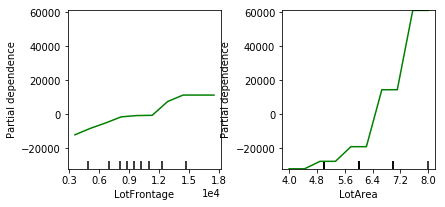

In [66]:
# make partial dependence plots

my_plots = plot_partial_dependence(my_model, X = train_X, features = [3, 4], 
                                   feature_names = data.columns,
                                   grid_resolution=10)

In [4]:
# ==================  Important Steps For Model ==========================

# Feature Selection 
# Data Normalization in case of diff dispersion between features

In [2]:
# ==================  Cross Validation  ================

# In cross-validation, we run our modeling process on different subsets of the data to get multiple 
# measures of model quality. For example, we could have 5 folds or experiments. We divide the data 
# into 5 pieces, each being 20% of the full dataset.

# We run an experiment called experiment 1 which uses the first fold as a holdout set, and everything
# else as training data. This gives us a measure of model quality based on a 20% holdout set, much as 
# we got from using the simple train-test split. We then run a second experiment, where we hold out data 
# from the second fold (using everything except the 2nd fold for training the model.) This gives us a 
# second estimate of model quality. We repeat this process, using every fold once as the holdout. Putting 
# this together, 100% of the data is used as a holdout at some point.

# Returning to our example above from train-test split, if we have 5000 rows of data, we end up with a measure 
# of model quality based on 5000 rows of holdout (even if we don't use all 5000 rows simultaneously.

In [3]:
#  ==================== Data Leakage  ============================

# This is very important to check if your model has a very high accuracy.
# In that case, you need to check leakage of data and should exclude some features that leak the predictions.